<a href="https://colab.research.google.com/github/usshaa/Cheatsheets/blob/main/Activity5_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model – Predicting Student Salary


### 🎯 Objective:

Build and evaluate a regression model to **predict the salary of placed students** based on academic and profile data.

## ✅ Exercise: Predicting Salary of Placed Students

### 🔶 Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### 🔶 Step 2: Load and Filter Dataset

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('Cleaned_College_Placement.csv')

# Use only placed students with valid salary values
df_salary = df[(df['status'] == 1) & (df['salary'].notnull())]

df_salary.head()


,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary,avg_academic_score
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,Mkt&Hr,58.80,1,270000.0,68.700
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,Mkt&Fin,66.28,1,200000.0,75.355
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,Mkt&Fin,57.80,1,250000.0,63.700
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,Mkt&Fin,55.50,1,425000.0,72.050
7,8,0,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,1,Mkt&Fin,62.14,1,252000.0,68.535


### 🔶 Step 3: Define Features and Target

In [ ]:
X = df_salary.drop(['salary', 'Sno', 'status'], axis=1)
y = df_salary['salary']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)


### 🔶 Step 4: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🔶 Step 5: Feature Scaling


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🔶 Step 6: Train Regression Model

In [ ]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

### 🔶 Step 7: Model Evaluation


In [ ]:
y_pred = regressor.predict(X_test_scaled)

print("✅ R2 Score:", r2_score(y_test, y_pred))
print("🔎 MAE:", mean_absolute_error(y_test, y_pred))
print("🔎 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


✅ R2 Score: -0.4856632544542314
🔎 MAE: 80649.33333333333
🔎 RMSE: 112073.03425296678


### 🔶 Step 8: Visualize Actual vs Predicted

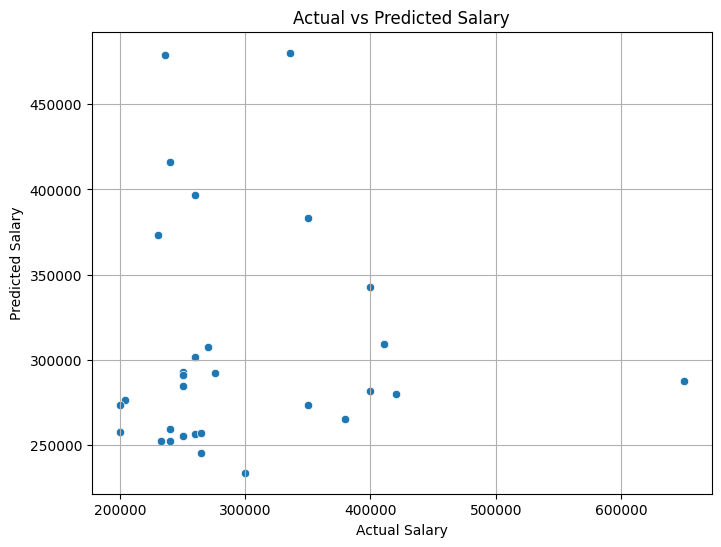

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


### 🔶 Step 9: Feature Importance (Optional)


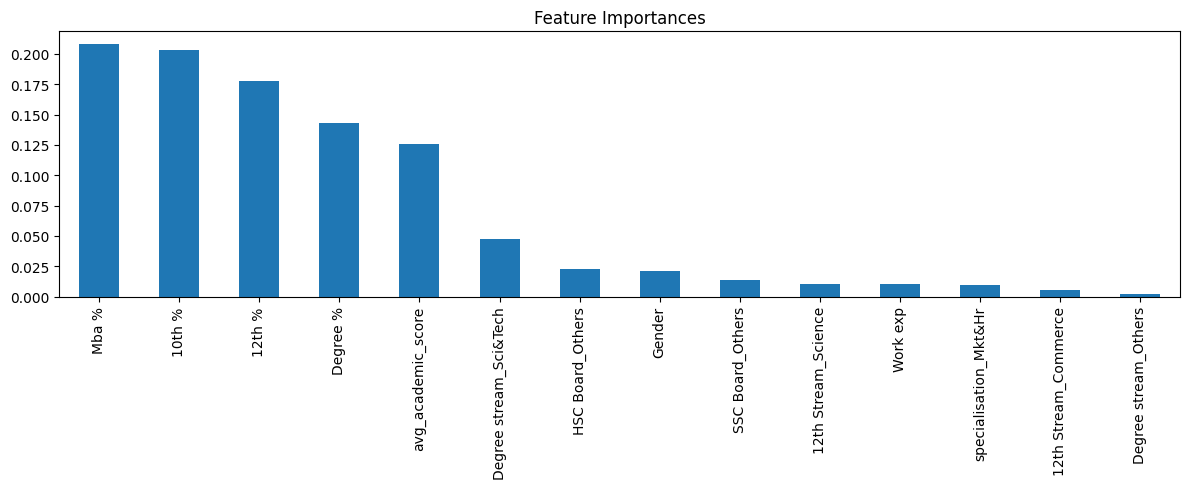

In [ ]:
importances = pd.Series(regressor.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), title="Feature Importances")
plt.tight_layout()
plt.show()


Would you like to:

* Try another regressor (e.g., Linear Regression, XGBoost)?
* Perform cross-validation or hyperparameter tuning?
* Deploy this model as an API?
